In [4]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
hr_data=pd.read_csv('C:/Users/Sreekanth/Desktop/SKILLS/MY PROJECTS/human-resources-analytics/HR_comma_sep.csv')

In [6]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
hr_data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [10]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [11]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


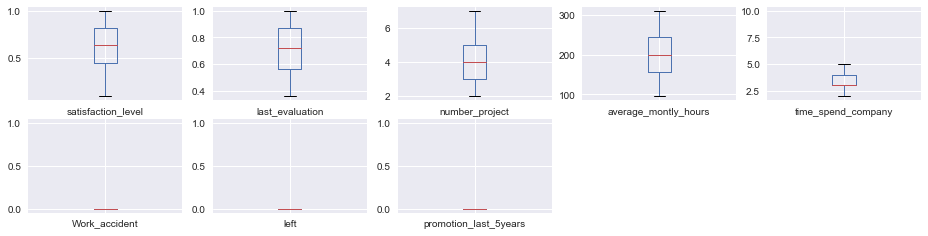

In [12]:
hr_data.plot(kind= 'box' , subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(16,10))
plt.show()

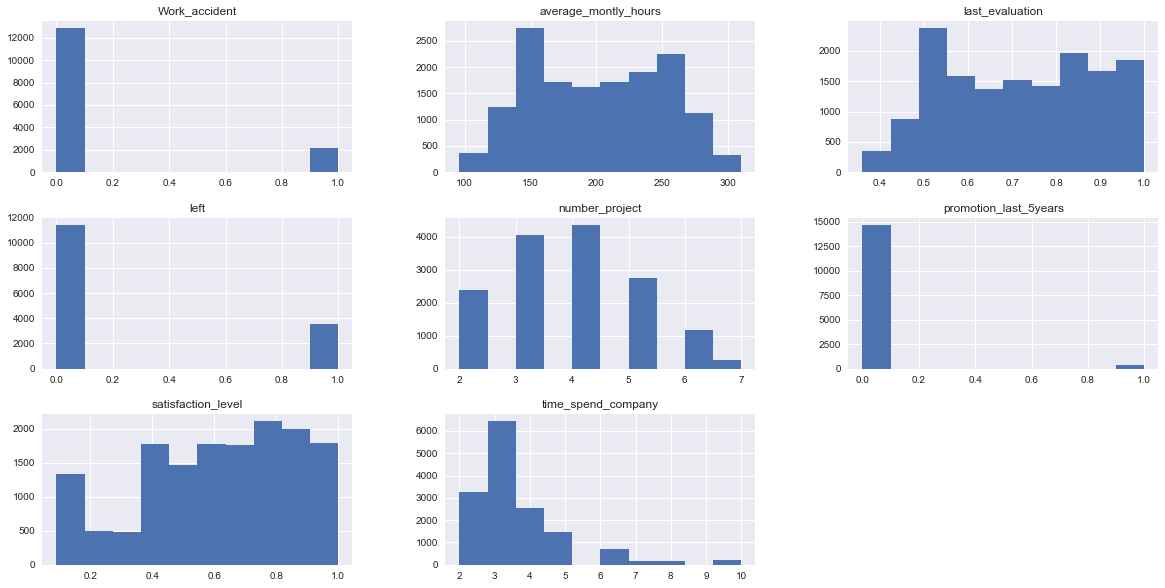

In [13]:
hr_data.hist(figsize=(20,10))
plt.show()

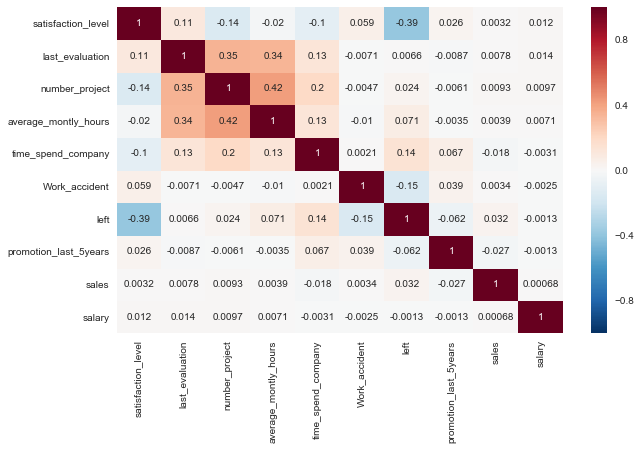

In [23]:
corr=hr_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

In [22]:
corr['left']

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
sales                    0.032105
salary                  -0.001294
Name: left, dtype: float64

CONVERTING CATEGORICAL TO CONTINUOUS BY LABEL ENCODER


In [20]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['sales','salary']
for col in cat_vars:
    hr_data[col]=labelEnc.fit_transform(hr_data[col])
    

hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [17]:
X=hr_data[hr_data.columns.difference(['left'])]
Y=hr_data['left']


GETTING THE TRAIN ,TEST DATA

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 23, test_size = 0.2)

In [16]:
print (X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(11999, 9) (3000, 9) (11999,) (3000,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,confusion_matrix,classification_report

## LOGESTIC REGRESSION:::::::::::::::::::::::::::::::::::::::::::

In [18]:
#LOGESTIC REGRESSION::::::::::::::::::::::::::::::::::::

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

77.040000000000006

In [19]:
#testing Accuracy
metrics.accuracy_score(Y_test,Y_pred)

0.7583333333333333

In [20]:
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[2092,  141],
       [ 584,  183]])

In [21]:
print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 2092 | 141 |
Actual   |-----|-----|
       1 | 584 | 183 |
         |-----|-----|


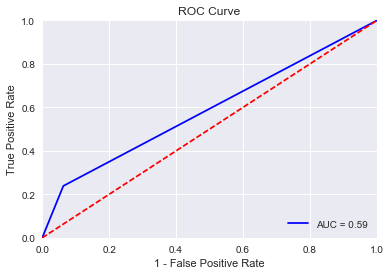

In [22]:
###ROC/AUC CURVE
fpr1, tpr1, threshold = metrics.roc_curve(Y_test, Y_pred)
roc_auc_logreg = metrics.auc(fpr1, tpr1)
plt.title('ROC Curve')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('1 - False Positive Rate')
plt.show()

PRECISION AND RECALL CALCULATIONS

In [23]:
report=metrics.classification_report(Y_test,Y_pred)
print (report)

             precision    recall  f1-score   support

          0       0.78      0.94      0.85      2233
          1       0.56      0.24      0.34       767

avg / total       0.73      0.76      0.72      3000



K-fold Cross Validation:

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
scores = cross_val_score(LogisticRegression(),X_train, Y_train, scoring='accuracy', cv=10)

print("List of Scores for CV Folds:")
[print(score) for score in scores]

print("\nMean Accuracy")
print(scores.mean())

List of Scores for CV Folds:
0.792672772689
0.771856786012
0.754371357202
0.767693588676
0.7825
0.765638031693
0.779816513761
0.758965804837
0.761467889908
0.772310258549

Mean Accuracy
0.770729300333


# KNN Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pyplot import *

In [27]:
#KNN Classifier

knn = KNeighborsClassifier(n_neighbors = 5)
clf=knn.fit(X_train, Y_train)
Y_pred_KNN = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

95.450000000000003

In [28]:
#testing Accuracy
metrics.accuracy_score(Y_test,Y_pred_KNN)

0.93133333333333335

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_KNN=confusion_matrix(Y_test,Y_pred_KNN)
confusion_matrix_KNN

array([[2091,  142],
       [  64,  703]])

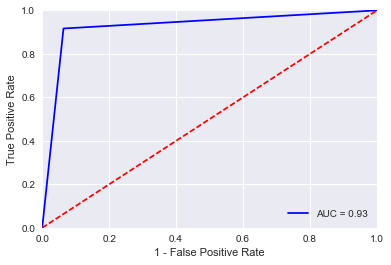

In [30]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_KNN)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('1 - False Positive Rate')
plt.show()

In [31]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5),X_train, Y_train, scoring='accuracy', cv=10)

print("List of Scores for CV Folds:")
[print(score) for score in scores]

print("\nMean Accuracy")
print(scores.mean())

List of Scores for CV Folds:
0.9367194005
0.93089092423
0.933388842631
0.93089092423
0.933333333333
0.942452043369
0.927439532944
0.930775646372
0.927439532944
0.933277731443

Mean Accuracy
0.9326607912


In [32]:
report=metrics.classification_report(Y_test,Y_pred_KNN)
print (report)

             precision    recall  f1-score   support

          0       0.97      0.94      0.95      2233
          1       0.83      0.92      0.87       767

avg / total       0.93      0.93      0.93      3000



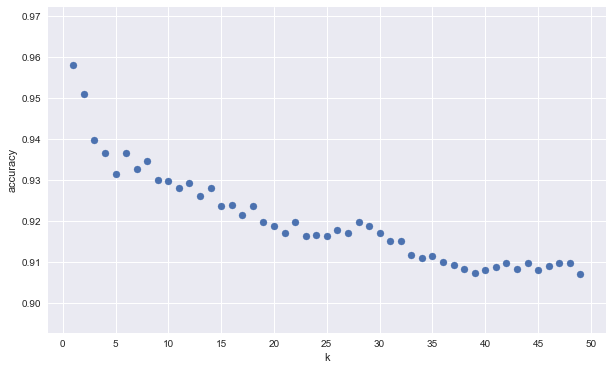

In [37]:
k_range = range(1,50)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))

plt.figure(figsize=(10,6))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50]);

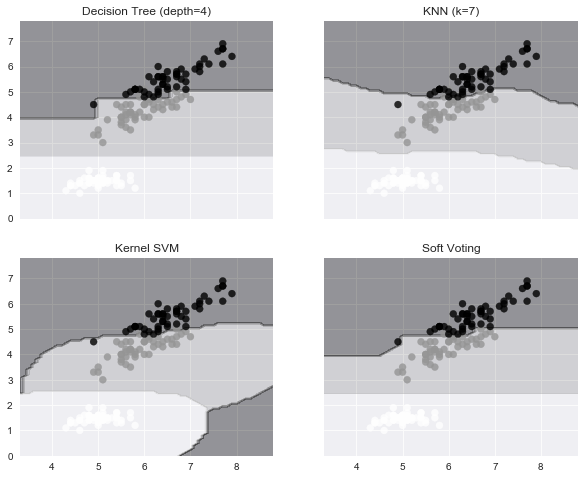

In [31]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)y

plt.show()

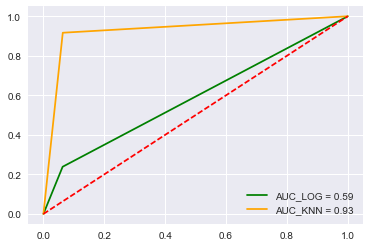

In [34]:
plt.figure(0).clf()
plt.plot(fpr1, tpr1, 'b', label = 'AUC_LOG = %0.2f' % roc_auc_logreg,color='green')
plt.plot(fpr, tpr, 'b', label = 'AUC_KNN = %0.2f' % roc_auc,color='orange')
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=0)
plt.show()

# SVM CLASSIFIER

In [35]:
from sklearn.svm import SVC

In [36]:
svc = SVC()
clf=svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

96.299999999999997

In [37]:
metrics.accuracy_score(Y_test,Y_pred_svc)

0.94666666666666666

In [38]:
confusion_matrix(Y_test,Y_pred_svc)

array([[2144,   89],
       [  71,  696]])

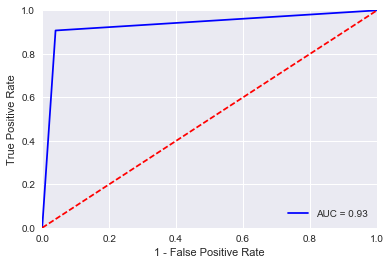

In [39]:
fpr2, tpr2, threshold = metrics.roc_curve(Y_test, Y_pred_svc)
roc_auc2 = metrics.auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('1 - False Positive Rate')
plt.show()

## DECISION TREE CLASSIFIER:::::::::

In [43]:
from sklearn import tree
decisiontree = tree.DecisionTreeClassifier()

In [48]:
clf=decisiontree.fit(X_train, Y_train)
Y_pred_dec = decisiontree.predict(X_test)
acc_decision = round(decisiontree.score(X_train, Y_train) * 100, 8)
acc_decision

100.0

In [70]:
metrics.accuracy_score(Y_test,Y_pred_dec)

0.98066666666666669

In [49]:
confusion_matrix(Y_test,Y_pred_dec)

array([[2195,   38],
       [  20,  747]])

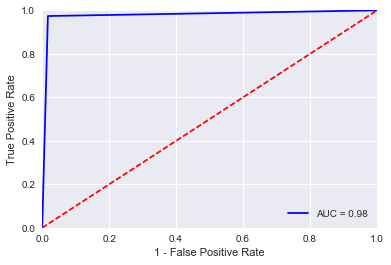

In [67]:
fpr3,tpr3,threshold=metrics.roc_curve(Y_test,Y_pred_dec)
roc_auc_dec = metrics.auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc_dec)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('1 - False Positive Rate')
plt.show()

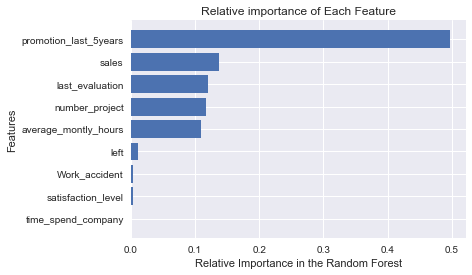

In [84]:
importance_list = decisiontree.feature_importances_
name_list = hr_data.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

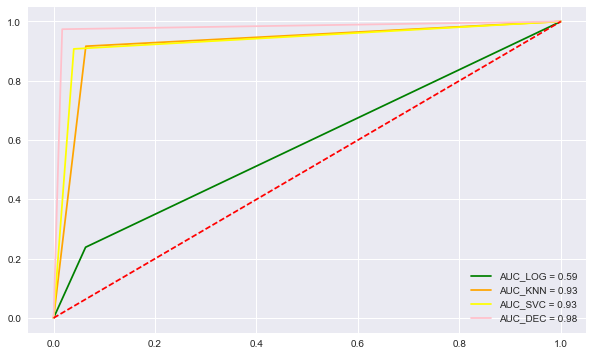

In [68]:
plt.figure(0,figsize=(10,6)).clf()
plt.plot(fpr1, tpr1, 'b', label = 'AUC_LOG = %0.2f' % roc_auc_logreg,color='green')
plt.plot(fpr, tpr, 'b', label = 'AUC_KNN = %0.2f' % roc_auc,color='orange')
plt.plot(fpr2, tpr2, 'b', label = 'AUC_SVC = %0.2f' % roc_auc2,color='yellow')
plt.plot(fpr3, tpr3, 'b', label = 'AUC_DEC = %0.2f' % roc_auc_dec,color='pink')
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=0)
plt.show()